In [17]:
import tensorflow as tf
import sklearn

In [7]:
x=tf.Variable(3, name="x")
y=tf.Variable(4, name="y")
f=x*x*y+y+2

In [9]:
print(x+y)

tf.Tensor(7, shape=(), dtype=int32)


In [3]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

In [44]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)
print(theta)

tf.Tensor(
[[-3.6369858e+01]
 [ 4.3837374e-01]
 [ 9.5387232e-03]
 [-1.0928368e-01]
 [ 6.5278280e-01]
 [-3.6518991e-06]
 [-3.8027056e-03]
 [-4.1518757e-01]
 [-4.2780524e-01]], shape=(9, 1), dtype=float32)


Epoch 0 MSE = 9.060819
Epoch 100 MSE = 0.71551144
Epoch 200 MSE = 0.5691974
Epoch 300 MSE = 0.55500495
Epoch 400 MSE = 0.5464309
Epoch 500 MSE = 0.5402787
Epoch 600 MSE = 0.53584003
Epoch 700 MSE = 0.53263706
Epoch 800 MSE = 0.5303255
Epoch 900 MSE = 0.5286571


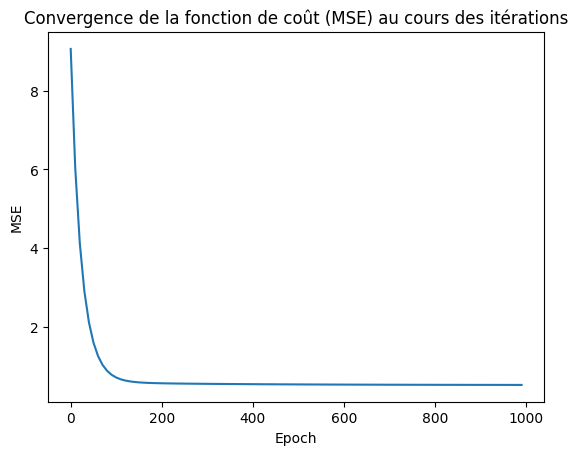

'C:/Users/Chouaib/ML/checkpoints/checkpoint_theta_LR_using_keras_as_optimizer_for_gradient-1'

In [66]:
m, n = housing.data.shape
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random.uniform([n + 1, 1], -1.0, 1.0), name="theta")
mse_values = []
#training loop
for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, theta, name="predictions")
        error = y_pred - y
        mse = tf.reduce_mean(tf.square(error), name="mse")

    gradients = tape.gradient(mse, theta)
    optimizer.apply_gradients([(gradients, theta)])

    # Enregistrer la valeur de MSE toutes les 10 époques
    if epoch % 10 == 0:
        mse_values.append(mse.numpy())
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.numpy())

plt.plot(range(0, n_epochs, 10), mse_values)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Convergence de la fonction de coût (MSE) au cours des itérations")
plt.show()

checkpoint = tf.train.Checkpoint(theta=theta)
checkpoint.save("C:/Users/Chouaib/ML/checkpoints/checkpoint_theta_LR_using_keras_as_optimizer_for_gradient")

In [67]:
import tensorflow as tf

In [70]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chargement du jeu de données
digits = load_digits()
X = digits.data
y = digits.target

# Séparation en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Création du modèle DNN
dnn_clf = keras.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=(X_train.shape[1],)),  # 1ère couche cachée
    keras.layers.Dense(100, activation="relu"),  # 2ème couche cachée
    keras.layers.Dense(10, activation="softmax")  # Couche de sortie pour 10 classes (digits de 0 à 9)
])

# Compilation du modèle
dnn_clf.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Entraînement du modèle
dnn_clf.fit(X_train, y_train, batch_size=50, epochs=10, validation_data=(X_val, y_val))


C:\Users\Chouaib\ML\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4661 - loss: 1.7670 - val_accuracy: 0.9139 - val_loss: 0.4402
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9426 - loss: 0.3160 - val_accuracy: 0.9611 - val_loss: 0.1734
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9741 - loss: 0.1371 - val_accuracy: 0.9722 - val_loss: 0.1138
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9876 - loss: 0.0777 - val_accuracy: 0.9722 - val_loss: 0.0940
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9927 - loss: 0.0557 - val_accuracy: 0.9667 - val_loss: 0.0863
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9960 - loss: 0.0336 - val_accuracy: 0.9778 - val_loss: 0.0775
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9986 - loss: 0.0248 - val_accuracy: 0.9750 - val_loss: 0.0744
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9994 - loss: 0.0166 - val_accuracy: 0.9750 - val_loss

In [79]:
from sklearn.metrics import accuracy_score
y_pred_prob = dnn_clf.predict(X_train)

y_pred = np.argmax(y_pred_prob, axis=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [80]:
accuracy_score(y_train, y_pred)

1.0

In [82]:
y_train

array([6, 0, 0, ..., 2, 7, 1])